# Lab 4

### Soh Zu Wei, A21, U2111130L

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sb
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
#Import data
df = pd.read_csv('./lab4_sampledata.csv')

#REMOVE CNTR data, cause lab is only looking at FLOW
df = df.set_index("Type").drop("CNTR", axis=0).reset_index()
df

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,...,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate,Unnamed: 20
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,FLOW,aa.aa.aa.aa,19,21,e00eda07c0ff,28c0da0117ca,0x0800,102.0,2121,202.21.158.254,...,47,0x00,124,32665.0,443,0x10,1459,1437,2048,NaN
1167,FLOW,aa.aa.aa.aa,3,14,00235ed9b680,8cb64fe6b643,0x0800,691.0,691,123.136.64.58,...,17,0x00,121,42128.0,53,0x10,91,69,2048,NaN
1168,FLOW,aa.aa.aa.aa,3,14,00235ed9b680,8cb64fe6b643,0x0800,691.0,691,202.6.242.63,...,6,0x00,124,443.0,42215,0x10,1522,1500,2048,NaN
1169,FLOW,aa.aa.aa.aa,258,130,204e71cf1b0f,00239cd087c1,0x0800,537.0,919,171.67.76.38,...,6,0x00,56,80.0,2182,0x10,1522,1500,2048,NaN


## Exercise 4A: Top Talkers and Listeners

In [35]:
#THIS FUNCTION IS USED TO CALL AN ONLINE API to retrieve the organisation of an IP ADDRESS.

import json
import requests

def get_org(ip):
    url = "https://ipapi.co/" + ip + "/json/"
    resp = requests.get(url).text

    try:
        jsonObj = json.loads(resp)
        return jsonObj['org']
    except:
        return ''

In [36]:
#Count talkers
talkerCount = pd.DataFrame(df["src_IP"].value_counts()).reset_index()
talkerCount.columns = ['Src_IP', 'count']
talkerCount

,Src_IP,count
0,152.3.219.19,126
1,207.241.228.157,66
2,130.14.250.13,63
3,193.62.192.8,46
4,192.122.131.36,40
...,...,...
225,202.6.241.91,1
226,202.6.241.92,1
227,139.17.3.177,1
228,155.69.149.133,1


In [37]:
# Return only the top 5 talkers
top5Talker = talkerCount.nlargest(5, 'count')
top5Talker['Organisation'] = top5Talker['Src_IP'].apply(get_org)
top5Talker

,Src_IP,count,Organisation
0,152.3.219.19,126,DUKE-INTERCHANGE
1,207.241.228.157,66,INTERNET-ARCHIVE
2,130.14.250.13,63,NLM-GW
3,193.62.192.8,46,Jisc Services Limited
4,192.122.131.36,40,A-STAR


In [38]:
#Count listerners
listenersCount = pd.DataFrame(df["dst_IP"].value_counts()).reset_index()
listenersCount.columns = ['dst_IP', 'count']
listenersCount

,dst_IP,count
0,198.71.44.98,126
1,103.37.198.100,98
2,210.48.222.9,66
3,137.132.228.15,50
4,202.21.159.244,38
...,...,...
235,134.153.153.253,1
236,202.90.128.84,1
237,120.126.194.131,1
238,74.125.10.12,1


In [39]:
# Return only the top 5 listeners
listenersCount = listenersCount.nlargest(5, 'count')
listenersCount['Organisation'] = listenersCount['dst_IP'].apply(get_org)
listenersCount

,dst_IP,count,Organisation
0,198.71.44.98,126,None
1,103.37.198.100,98,A-STAR
2,210.48.222.9,66,International Islamic University Of Malaysia
3,137.132.228.15,50,NUS Information Technology
4,202.21.159.244,38,Republic Polytechnic. Multihoming AS Singapore


## Exercise 4B: Transport Protocol

In [40]:
#We know that TCP is port 6 and UDP is port 17

noOfTCP = (df["IP_protocol"] == 6).sum()
noOfUDP = (df["IP_protocol"] == 17).sum()
total = (df["IP_protocol"] != None).sum()

print("No of TCP packets is,",noOfTCP)
print("No of UDP packets is,",noOfUDP)
print("total packets is,",total)
print("Percentage of TCP is", noOfTCP/total * 100, "%")
print("Percentage of UDP is", noOfUDP/total * 100, "%")

No of TCP packets is, 879
No of UDP packets is, 135
total packets is, 1171
Percentage of TCP is 75.06404782237404 %
Percentage of UDP is 11.52860802732707 %


## Exercise 4C: Applications Protocol

In [41]:
dstIP_port_df = pd.DataFrame(df["udp_dst_port/tcp_dst_port/icmp_code"].value_counts()).reset_index()
dstIP_port_df.columns = ['dst_port', 'count']
dstIP_port_df

,dst_port,count
0,443,234
1,56152,82
2,0,81
3,43930,45
4,80,37
...,...,...
257,59053,1
258,41557,1
259,9042,1
260,44251,1


In [42]:
#Get top 5 frequently used application protocol
dstIP_port_Top5 = dstIP_port_df.nlargest(5, 'count')
dstIP_port_Top5


,dst_port,count
0,443,234
1,56152,82
2,0,81
3,43930,45
4,80,37


## Exercise 4D: Traffic

In [48]:

#Since we're sampling at a rating of 1/2048, we will need to multiply by 2048 to get the actual traffic size.
totalTraffic = df["IP_size"].sum() * 2048

#Assuming IP_size is in bytes, we convert it into Megabytes
totalTrafficMB = totalTraffic / (1024*1024)

print("Therefore total packet traffic is: ", totalTrafficMB, "MB")


Therefore total packet traffic is:  2109.146484375 MB


## Exercise 4E: Additional Analysis

### Get the top communicating IP address pairs (src IP and dest IP)
By identifying the top 5 communication pairs, we are able to figure out who are the users who are talking to each other the most based on their ip addresses. Subsequently, with the top communication pairs, we could also check which organisation those IP addresses belong to, and this would allow us to visualise organisations who are talking to each other.

In [57]:
#communication pairs
commPair_df = df.groupby(['src_IP', 'dst_IP']).size().reset_index(name='count')
commPair_df = commPair_df.sort_values(by="count", ascending=False)
commPair_df


,src_IP,dst_IP,count
117,152.3.219.19,198.71.44.98,126
262,207.241.228.157,210.48.222.9,66
46,130.14.250.13,103.37.198.100,63
213,193.62.192.8,137.132.228.15,46
45,130.14.250.11,103.37.198.100,35
...,...,...,...
142,155.69.160.32,74.125.200.138,1
144,155.69.160.69,172.217.27.14,1
147,155.69.160.73,23.199.85.190,1
148,155.69.160.73,54.169.175.67,1


In [60]:
#Retrieve only top 5 communication pairs
commPair_df_top5 = commPair_df.nlargest(5, 'count')
commPair_df_top5

,src_IP,dst_IP,count
117,152.3.219.19,198.71.44.98,126
262,207.241.228.157,210.48.222.9,66
46,130.14.250.13,103.37.198.100,63
213,193.62.192.8,137.132.228.15,46
45,130.14.250.11,103.37.198.100,35


In [74]:
#Retrieve only top 5 communication pairs
commPair_df_top5['src_Organisation'] = commPair_df_top5['src_IP'].apply(get_org)
commPair_df_top5['dest_Organisation'] = commPair_df_top5['dst_IP'].apply(get_org)
commPair_df_top5

,src_IP,dst_IP,count,src_Organisation,dest_Organisation
117,152.3.219.19,198.71.44.98,126,DUKE-INTERCHANGE,None
262,207.241.228.157,210.48.222.9,66,INTERNET-ARCHIVE,International Islamic University Of Malaysia
46,130.14.250.13,103.37.198.100,63,NLM-GW,A-STAR
213,193.62.192.8,137.132.228.15,46,Jisc Services Limited,NUS Information Technology
45,130.14.250.11,103.37.198.100,35,NLM-GW,A-STAR


### Finding out ip addresses who have sent the most amount of data over the network
This could be useful to discover and understand which users are sending the most data over the network, with that information, one could also then subsequently check which potential applications (by looking at port) the user is using to send those data. 

In [62]:
ipAddr_dataSent = pd.DataFrame(df.groupby("src_IP")['IP_size'].sum())
ipAddr_dataSent = ipAddr_dataSent.nlargest(5, 'IP_size')
ipAddr_dataSent

,IP_size
src_IP,
152.3.219.19,188496
207.241.228.157,99000
130.14.250.13,94500
193.62.192.8,63963
192.122.131.36,53938


In [78]:
#Finding out ports who are sent the most data
#This could be useful to understand which applications are sending the most data over the network
#By identifying the application ports, we can close the applications if we need to free up network utilisation for other purposes.

srcPort_dataSent = pd.DataFrame(df.groupby("udp_src_port/tcp_src_port/icmp_type")['IP_size'].sum())
srcPort_dataSent['IP_size'] = srcPort_dataSent['IP_size']
srcPort_dataSent = srcPort_dataSent.nlargest(5, 'IP_size')
srcPort_dataSent

,IP_size
udp_src_port/tcp_src_port/icmp_type,
443.0,265073
50076.0,122924
0.0,115165
50059.0,67460
80.0,64914


In [65]:
comm_df = pd.DataFrame({'from_ip': commPair_df['src_IP'], 'to_ip' :commPair_df['dst_IP']})
comm_df


,from_ip,to_ip
117,152.3.219.19,198.71.44.98
262,207.241.228.157,210.48.222.9
46,130.14.250.13,103.37.198.100
213,193.62.192.8,137.132.228.15
45,130.14.250.11,103.37.198.100
...,...,...
142,155.69.160.32,74.125.200.138
144,155.69.160.69,172.217.27.14
147,155.69.160.73,23.199.85.190
148,155.69.160.73,54.169.175.67


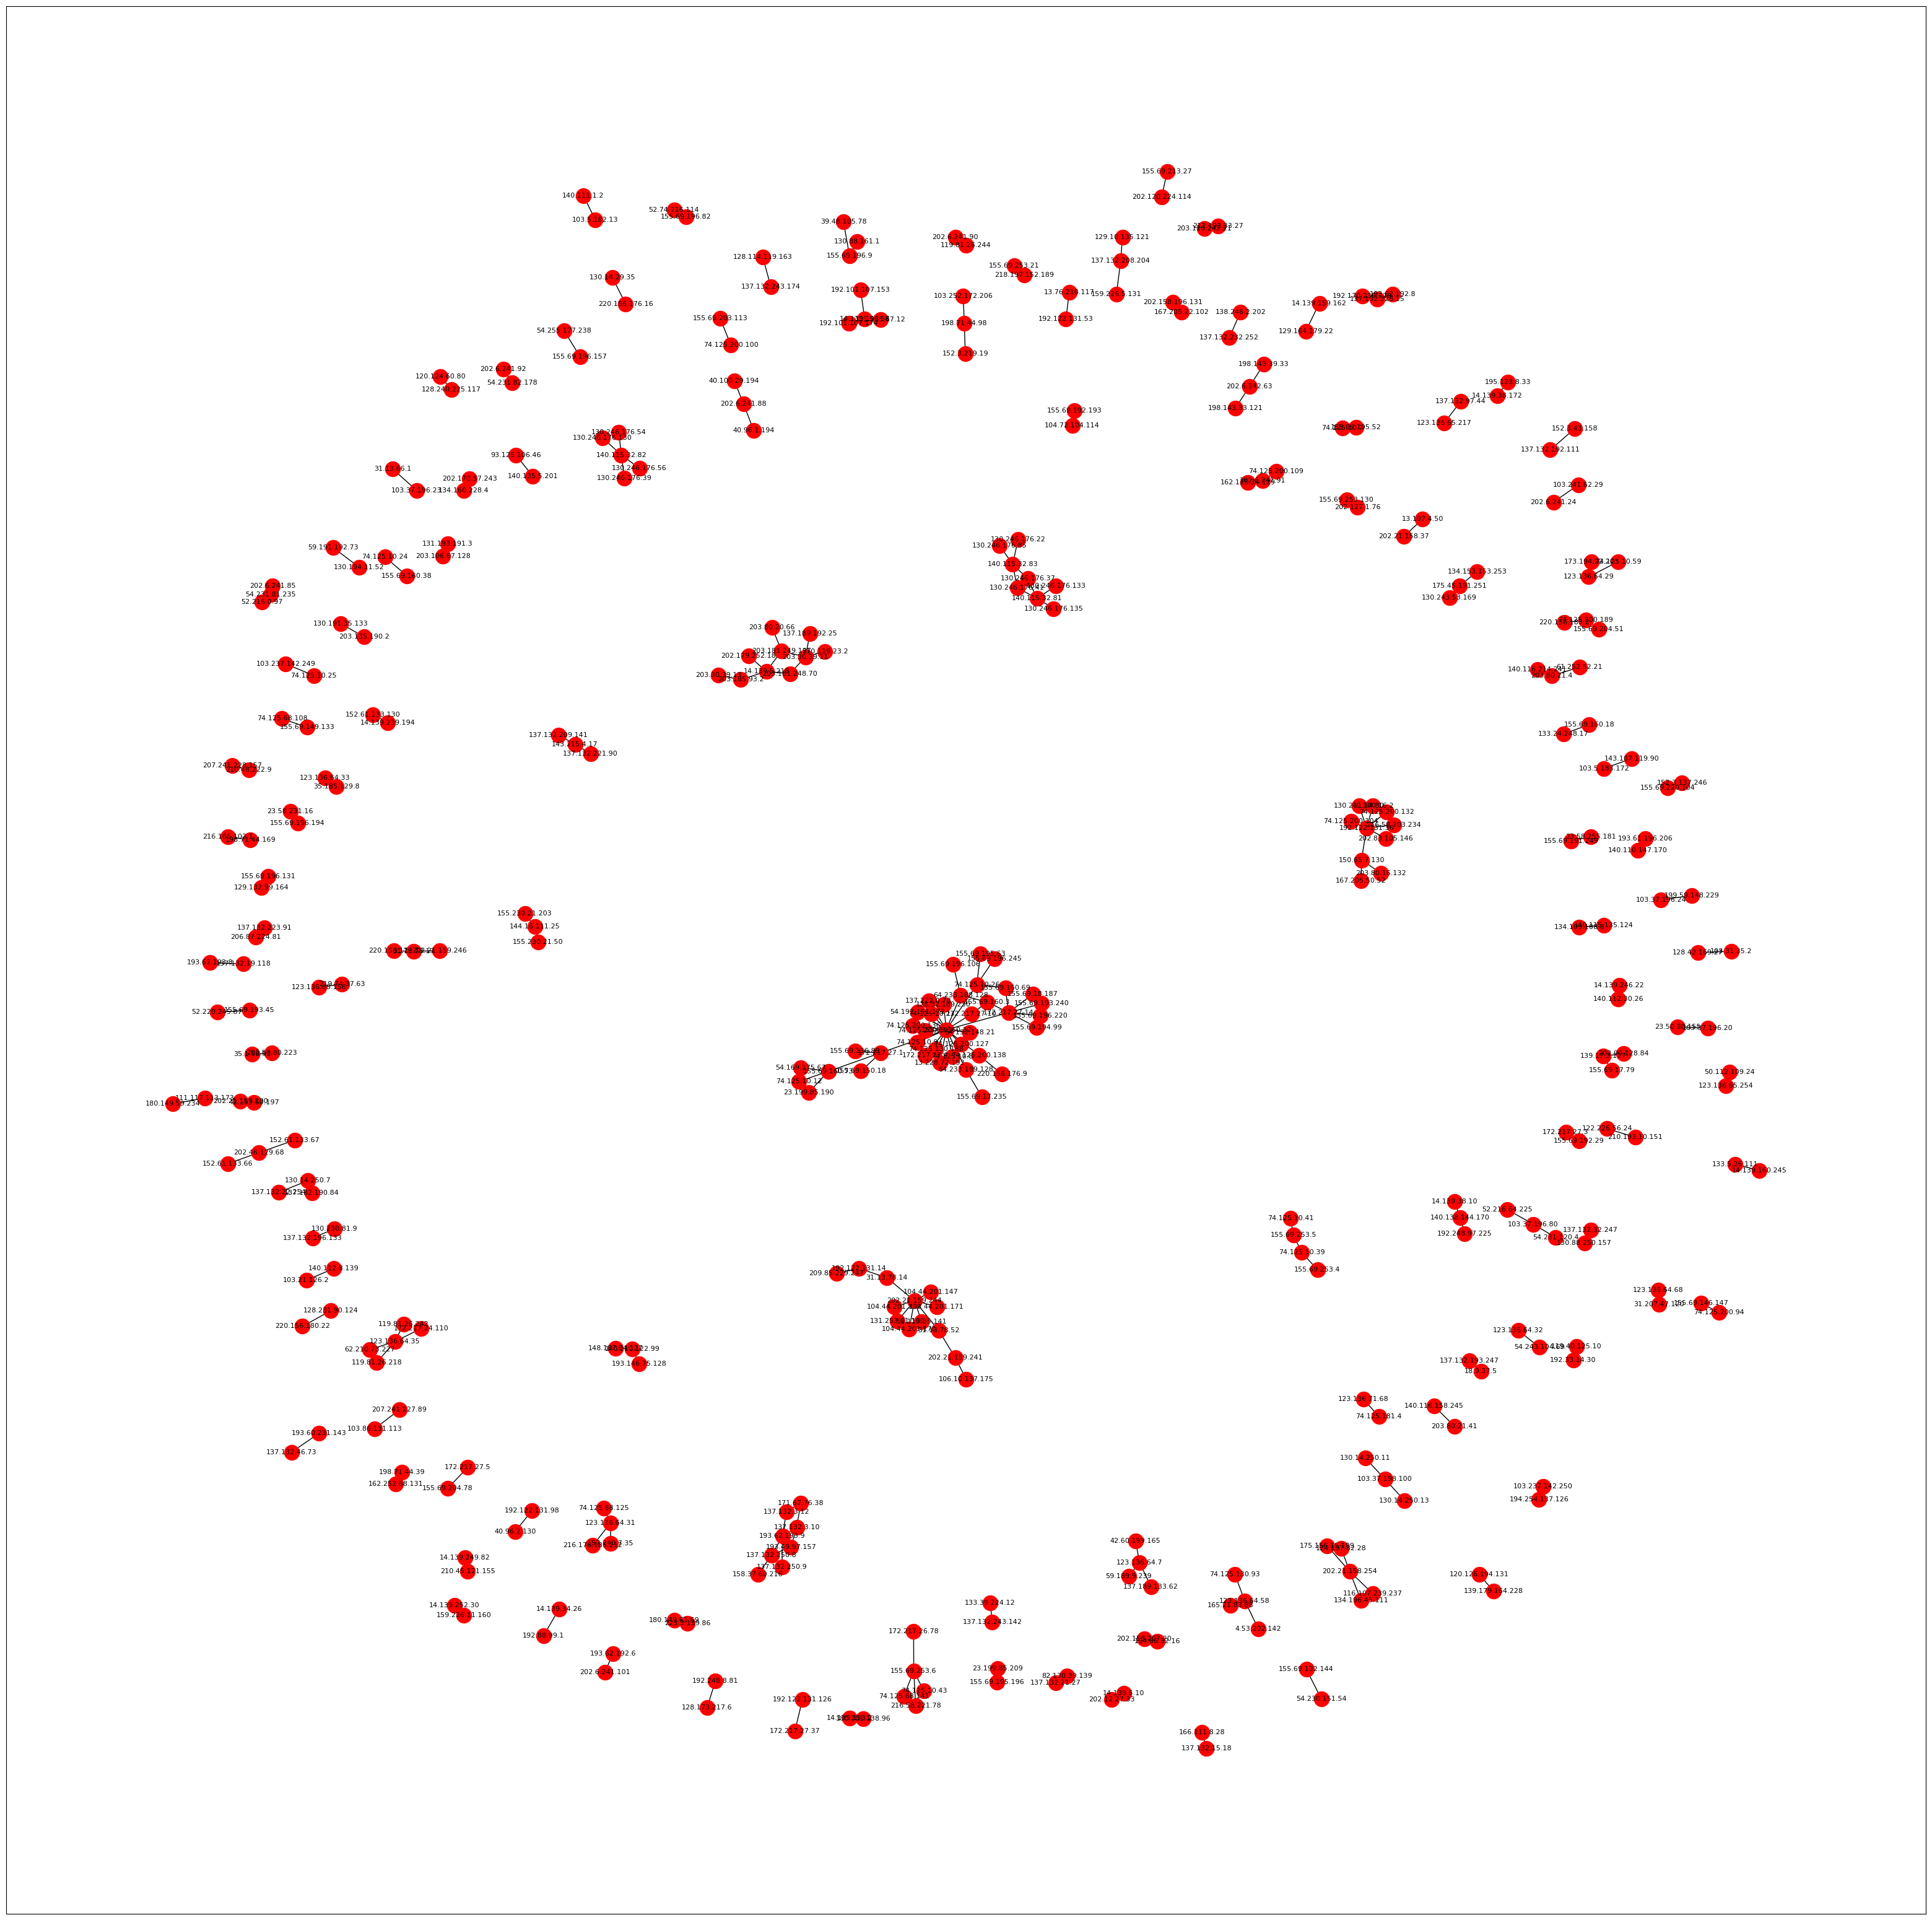

In [66]:
graph = nx.from_pandas_edgelist(comm_df, 'from_ip', 'to_ip')

plt.figure(figsize=(40,40))
gp=nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, gp, node_color='red')
nx.draw_networkx_edges(graph,gp)
nx.draw_networkx_labels(graph,gp,font_size=8)

plt.show()